In [2]:
import sys
sys.path = (
    [
        '/home/apilkevich/pycharm/BachelorDegree/',
        
    ] + sys.path
)

from nlp_adapter.train.training import set_up_exp

Start loading models...
All models are loading.

Start preparing data...


Load dataset from file:   0%|          | 0/6948 [00:00<?, ?it/s]

All data are ready.

Start training...


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/832 [00:00<?, ?it/s]

epoch 0/1000, epoch_step 831/832, global_step 832/20000
ce train loss: 1.7261, model train loss: 0.0545, kl loss: 0.0000
ce val loss: 1.2680, model val loss: 0.0456



  0%|          | 0/832 [00:00<?, ?it/s]

epoch 1/1000, epoch_step 831/832, global_step 1664/20000
ce train loss: 1.4715, model train loss: 0.0649, kl loss: 0.0000
ce val loss: 1.1635, model val loss: 0.0574



  0%|          | 0/832 [00:00<?, ?it/s]

epoch 2/1000, epoch_step 831/832, global_step 2496/20000
ce train loss: 1.2953, model train loss: 0.0724, kl loss: 0.0000
ce val loss: 1.1068, model val loss: 0.0813



  0%|          | 0/832 [00:00<?, ?it/s]

epoch 3/1000, epoch_step 831/832, global_step 3328/20000
ce train loss: 1.1687, model train loss: 0.0674, kl loss: 0.0000
ce val loss: 1.0889, model val loss: 0.0884



  0%|          | 0/832 [00:00<?, ?it/s]

epoch 4/1000, epoch_step 831/832, global_step 4160/20000
ce train loss: 1.0445, model train loss: 0.0561, kl loss: 0.0000
ce val loss: 1.1328, model val loss: 0.0572



  0%|          | 0/832 [00:00<?, ?it/s]

epoch 5/1000, epoch_step 831/832, global_step 4992/20000
ce train loss: 0.9420, model train loss: 0.0744, kl loss: 0.0000
ce val loss: 1.1194, model val loss: 0.0779



  0%|          | 0/832 [00:00<?, ?it/s]

epoch 6/1000, epoch_step 831/832, global_step 5824/20000
ce train loss: 0.8548, model train loss: 0.0699, kl loss: 0.0000
ce val loss: 1.1346, model val loss: 0.0501



  0%|          | 0/832 [00:00<?, ?it/s]

epoch 7/1000, epoch_step 831/832, global_step 6656/20000
ce train loss: 0.7901, model train loss: 0.0743, kl loss: 0.0000
ce val loss: 1.1432, model val loss: 0.0732



  0%|          | 0/832 [00:00<?, ?it/s]

epoch 8/1000, epoch_step 831/832, global_step 7488/20000
ce train loss: 0.7146, model train loss: 0.0861, kl loss: 0.0000
ce val loss: 1.2032, model val loss: 0.0732



  0%|          | 0/832 [00:00<?, ?it/s]

KeyboardInterrupt: 

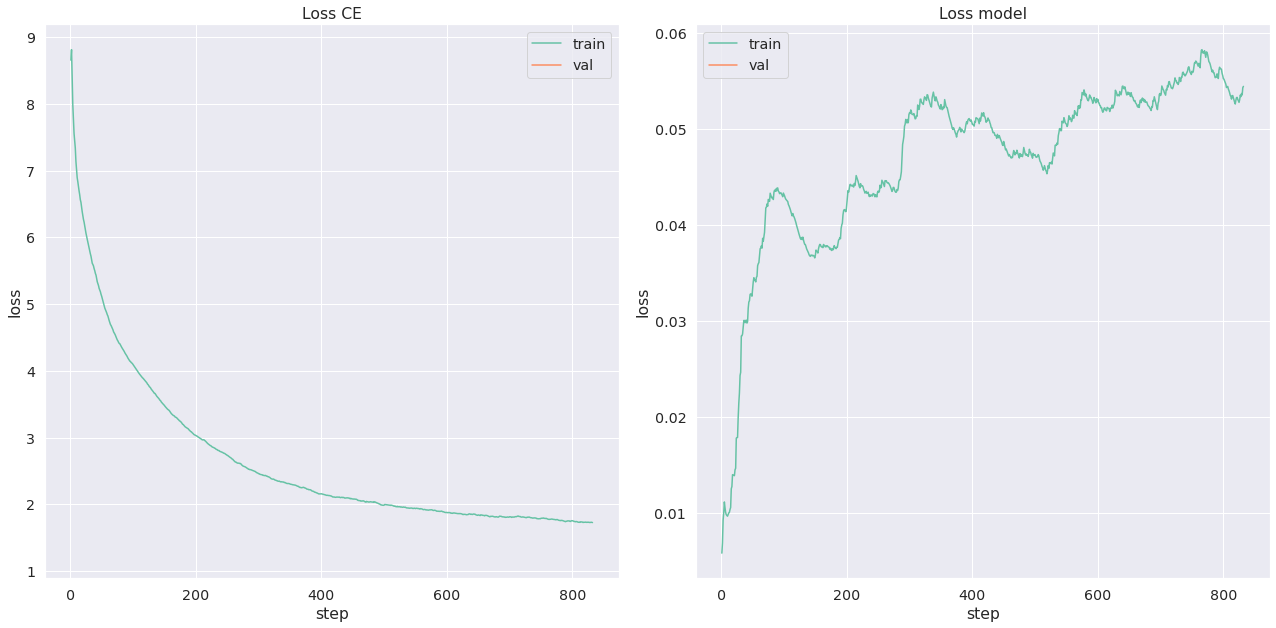

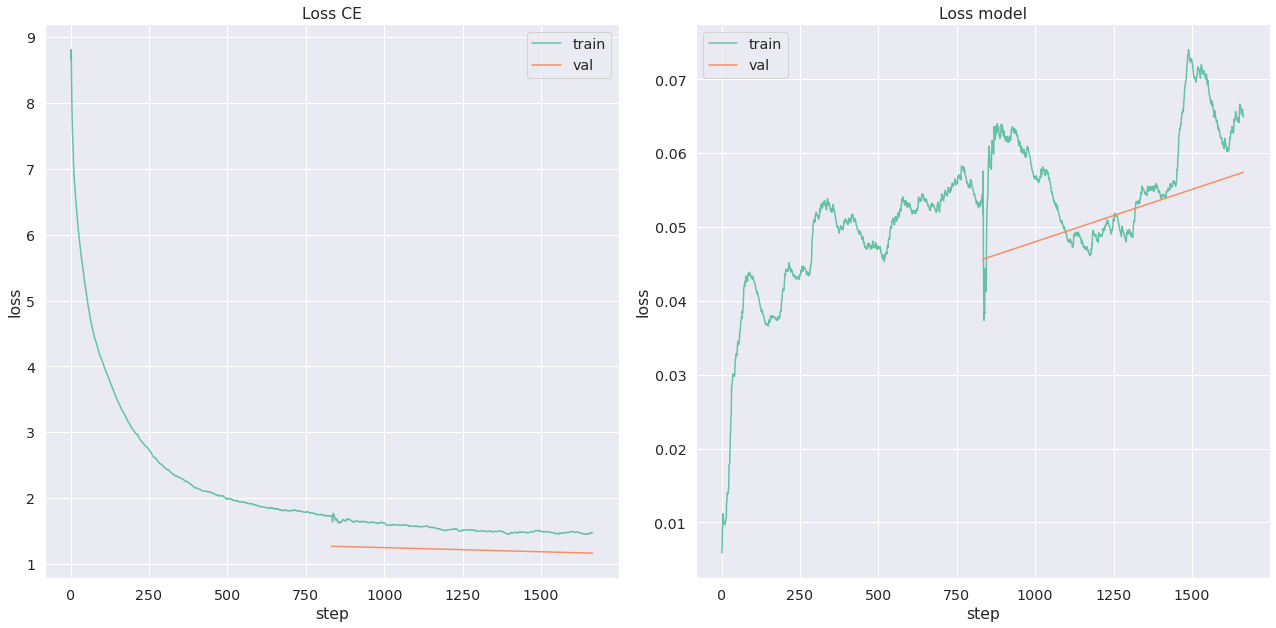

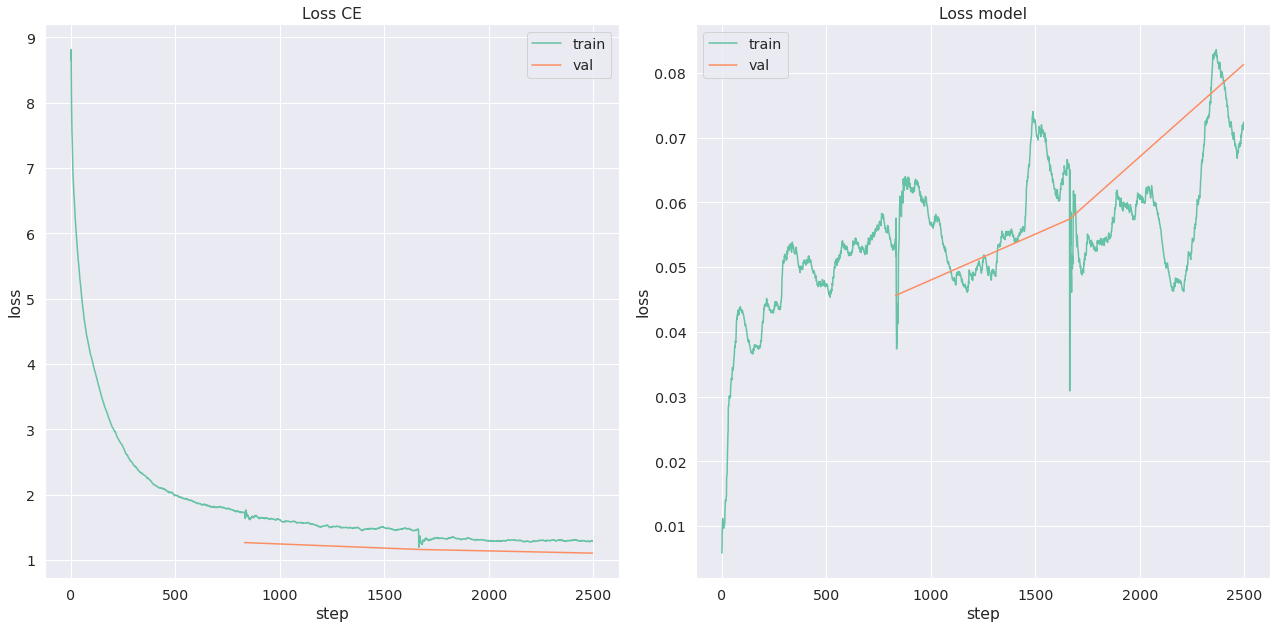

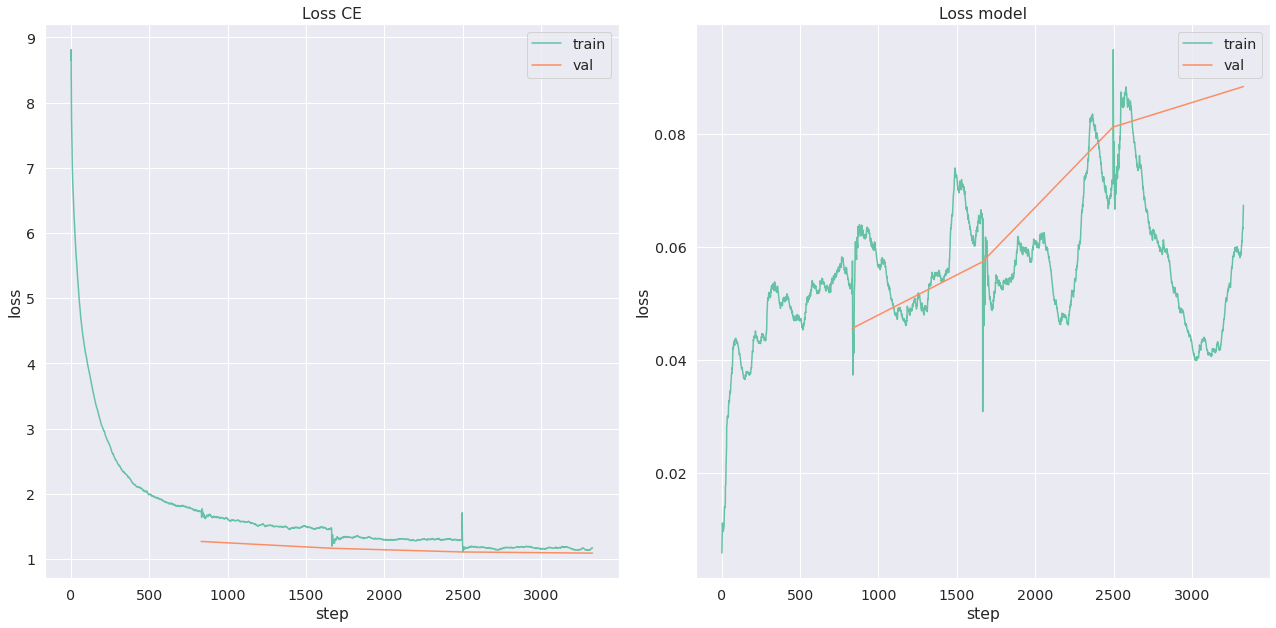

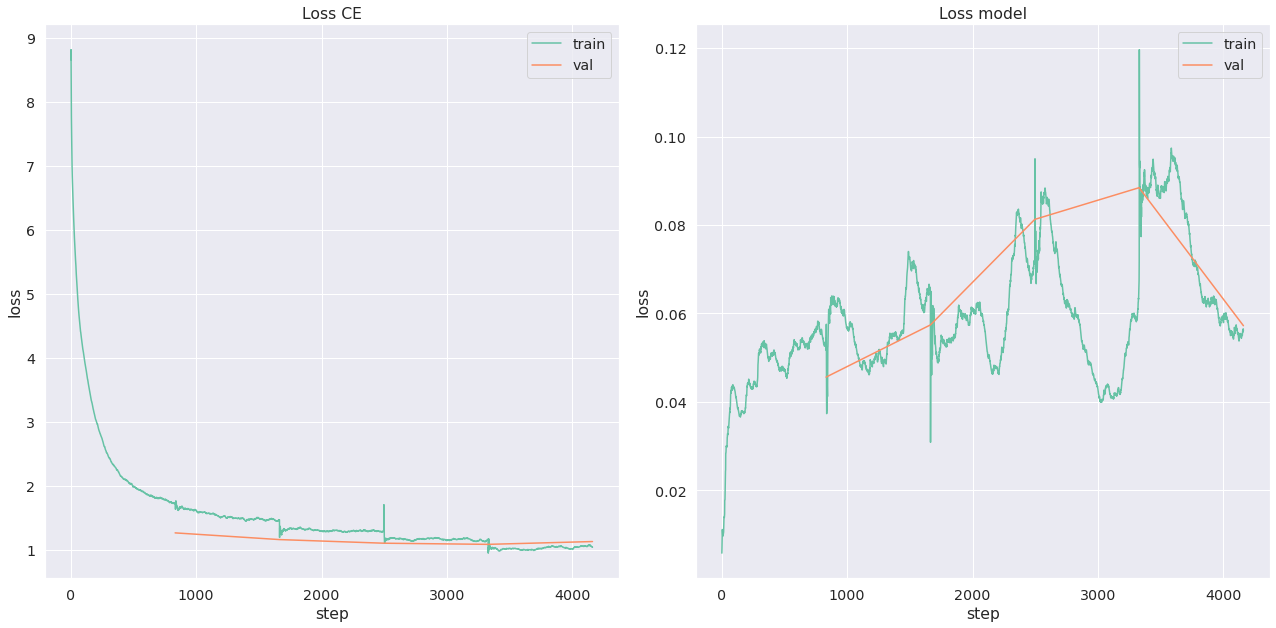

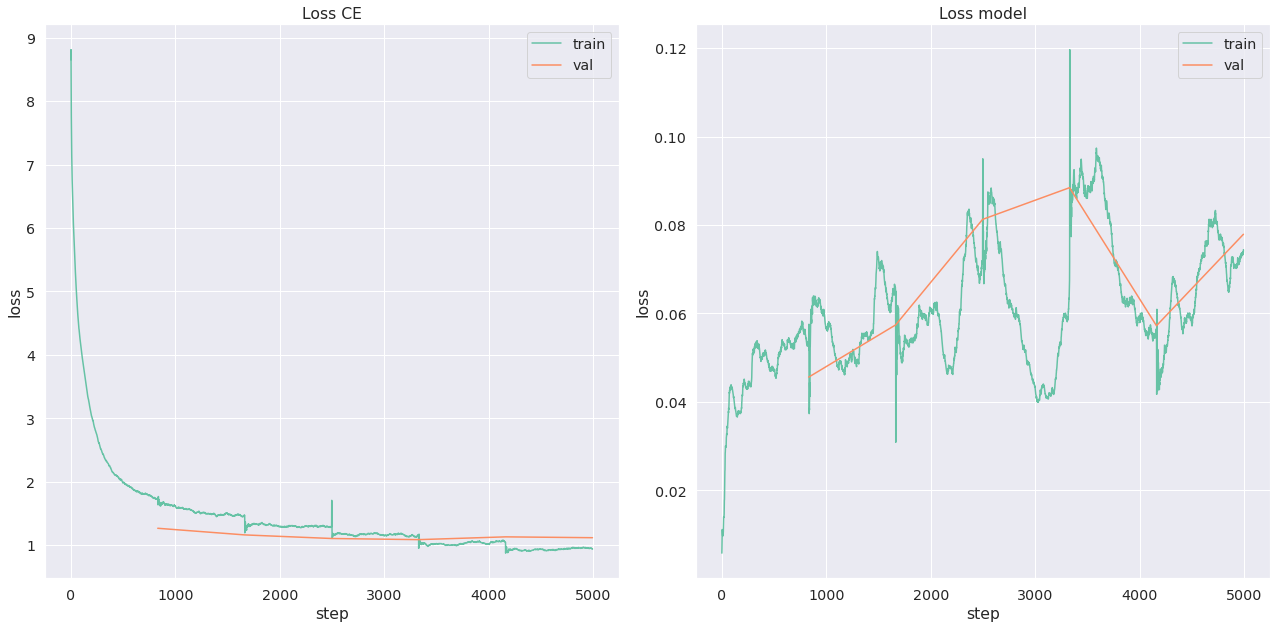

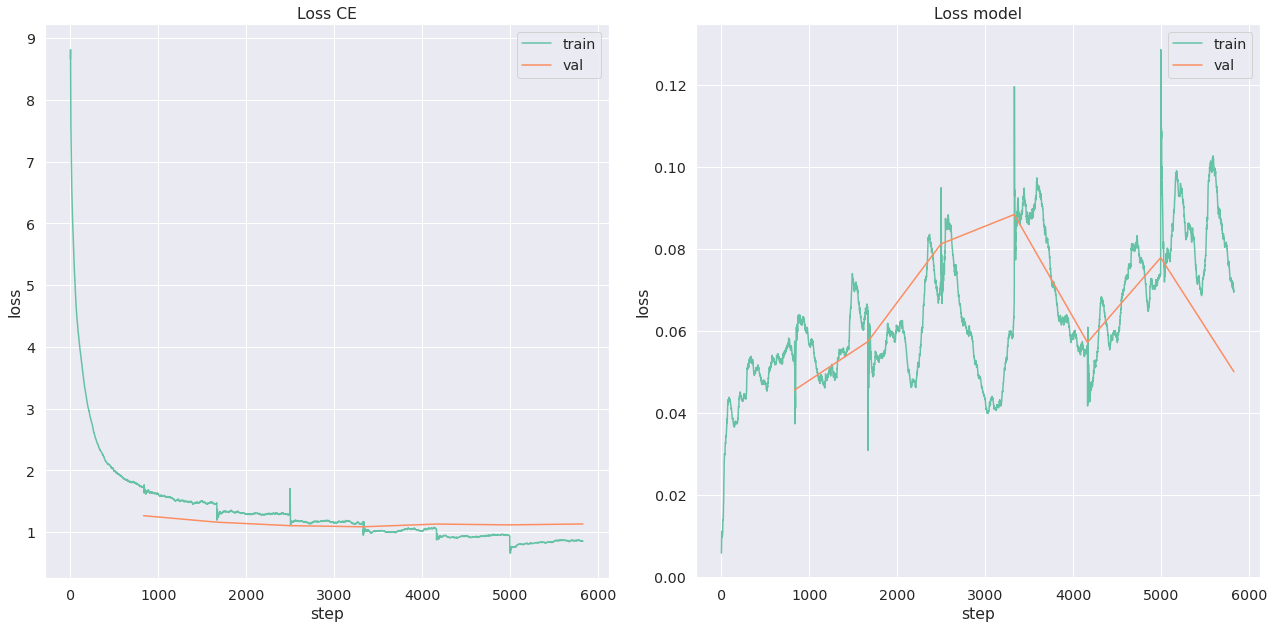

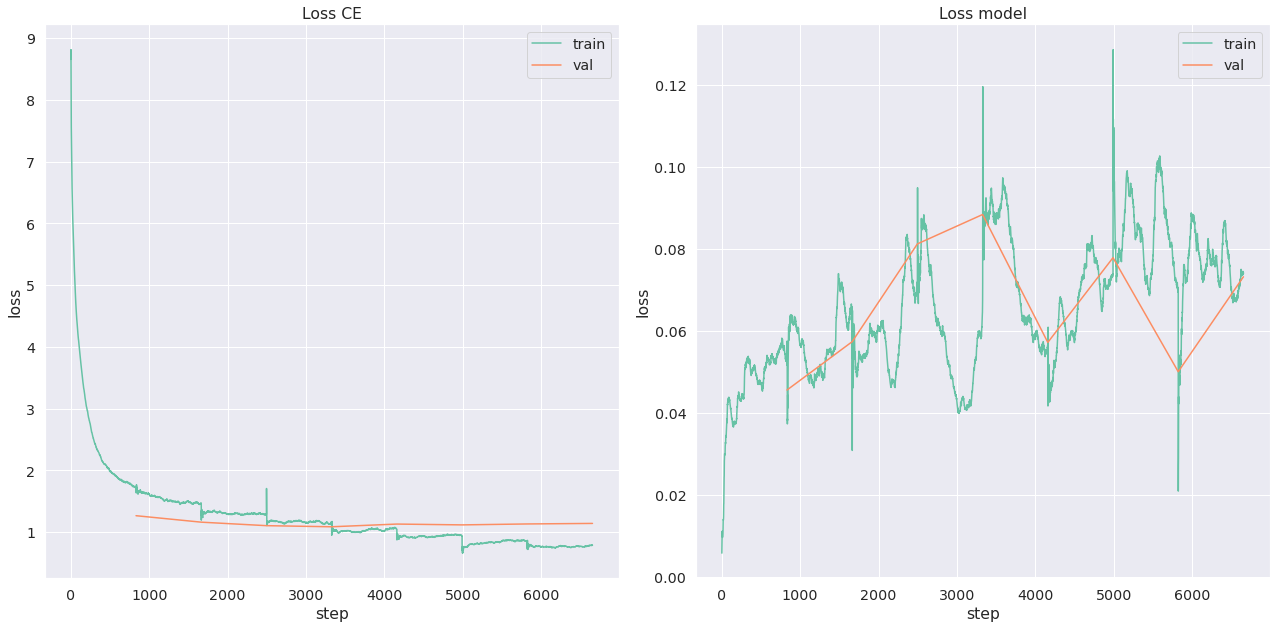

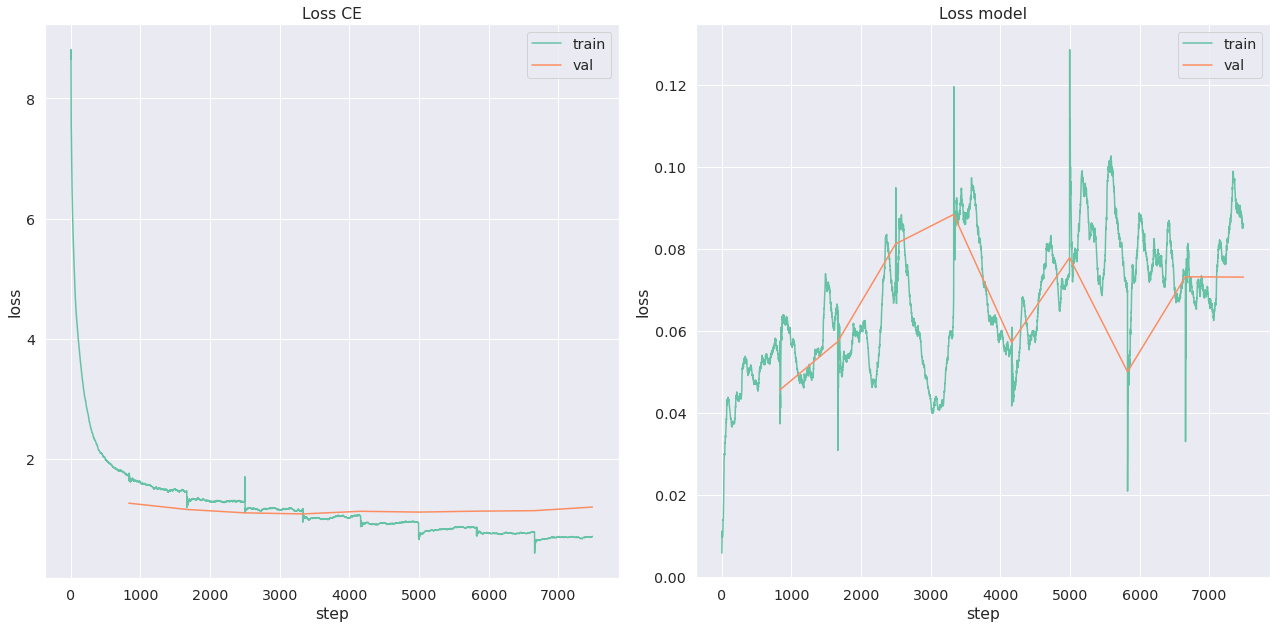

In [3]:
set_up_exp(
    data_path='/home/apilkevich/notebooks/mipt/BD/data/input/train.tsv',
    transformer_model_name='sberbank-ai/ruT5-base',
    tokenizer_model_name='sberbank-ai/ruT5-base',
    pretrain_adapter_path=None,
    batch_size=12,
    max_steps=20000,
    dump_model_name='pretrain_detox_s42/bs12_accum1',
    report_step=832,
    period_of_dump=2500,
    ce_w=1.0,
    model_w=0.0,
    train_model=True,
    train_adapter=False,
    seed=42,
    test_size=0.1,
    device='1',
    loss_mode='sum',
    model_lr=5e-5,
    num_accum_steps=1,
)

In [5]:
from nlp_adapter.evaluation.evaluation import inference

In [6]:
inference(
    data_path='/home/apilkevich/notebooks/mipt/BD/data/input/dev.tsv',
    model_name='./pretrain_detox_s42/bs12_accum1_7500',
    tokenizer_model_name='sberbank-ai/ruT5-base',
    result_path='/home/apilkevich/notebooks/mipt/BD/data/output/pretrain_bs12_accum1_7500.txt',
    device='1',
)

  0%|          | 0/13 [00:00<?, ?it/s]

In [7]:
from nlp_adapter.evaluation.evaluation import evaluate_and_dump

In [8]:
evaluate_and_dump(
    gold_label_path='/home/apilkevich/notebooks/mipt/BD/data/input/dev.tsv',
    predicts_path='/home/apilkevich/notebooks/mipt/BD/data/output/pretrain_bs12_accum1_7500.txt',
    name='pretrain_bs12_accum1_7500',
    output_path='./results.md',
    batch_size=32,
    device='1',
)

Load data...
Load models...


Some weights of the model checkpoint at cointegrated/LaBSE-en-ru were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Style evaluation


  0%|          | 0/25 [00:00<?, ?it/s]

Meaning evaluation


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Fluency evaluation


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

{'accuracy': 0.7395607233047485,
 'similarity': 0.799100935459137,
 'fluency': 0.8268899321556091,
 'joint': 0.4951663315296173,
 'chrf': 0.577461315320221,
 'accuracy_chrf': 0.4270677080387341}